In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
customer_df = pd.read_csv('customer_df.csv',index_col=0)
numericals = pd.read_csv('numericals_df.csv',index_col=0)
continuous_df = pd.read_csv('continuous_num_df.csv',index_col=0)
discrete_df = pd.read_csv('discrete_num_df.csv',index_col=0)
categoricals = pd.read_csv('categoricals_df_2.csv',index_col=0)

In [3]:
# 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel
# more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

# Answer: I have already removed the outliers in lab 'Cleaning numerical data'. Please see below the final result. There are
# some new outliers, which I will not remove as these were not outliers before.

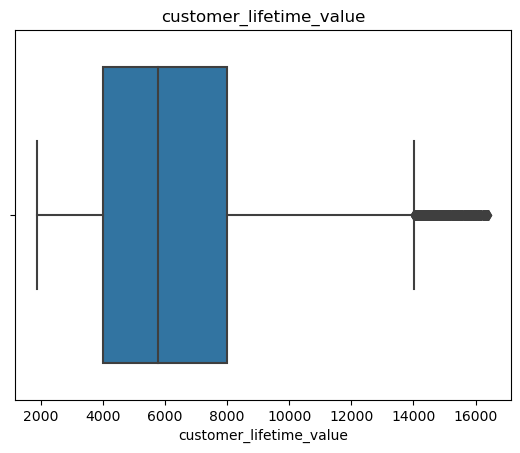

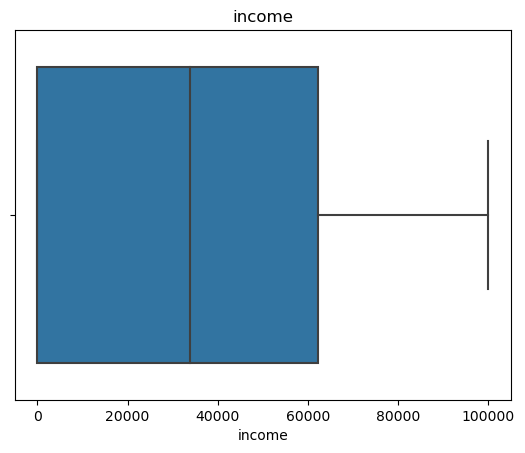

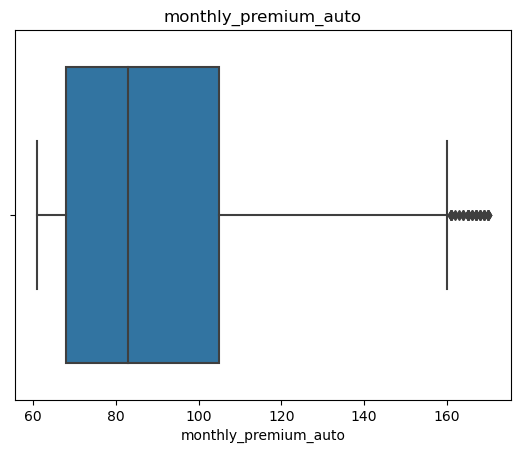

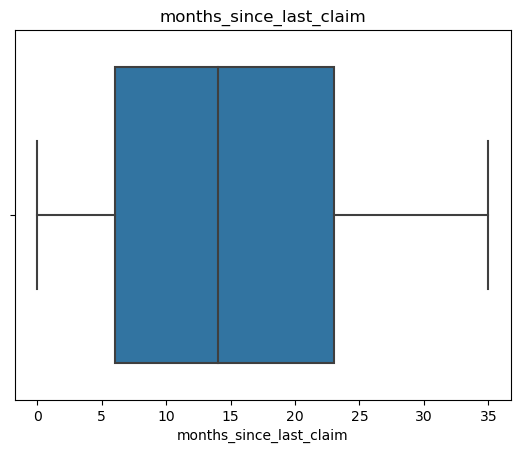

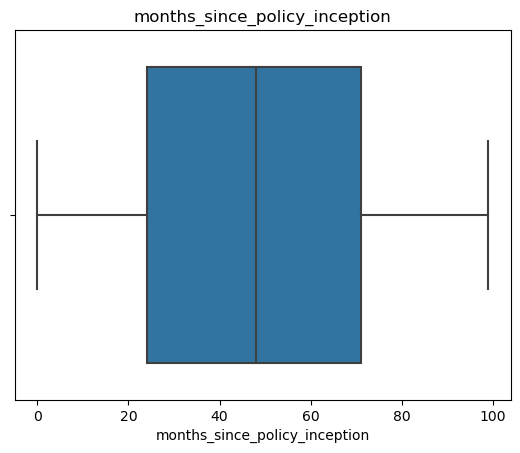

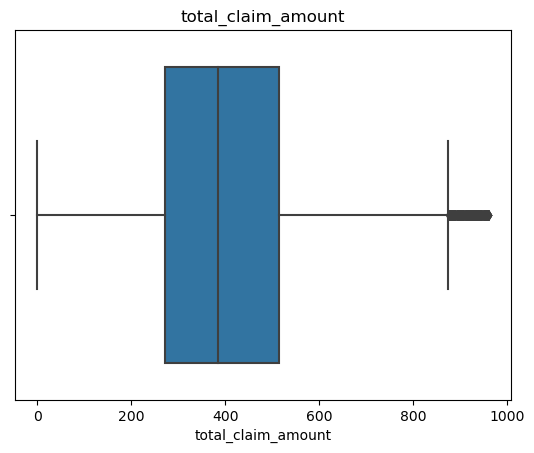

In [4]:
def continuous_boxplot(DataFrame):
    for col in DataFrame.columns:
        sns.boxplot(x=DataFrame[col])
        plt.title(col)
        plt.show()
    return
continuous_boxplot(continuous_df)

In [5]:
# 2. Create a copy of the dataframe for the data wrangling.

continuous_df_2 = continuous_df

In [6]:
# 3. Normalize the continuous variables. You can use any one method you want.

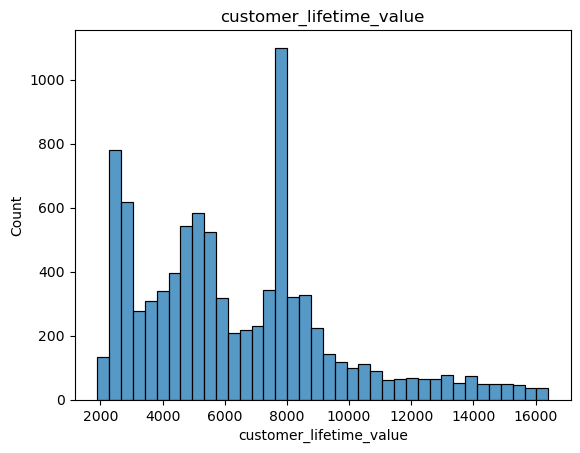

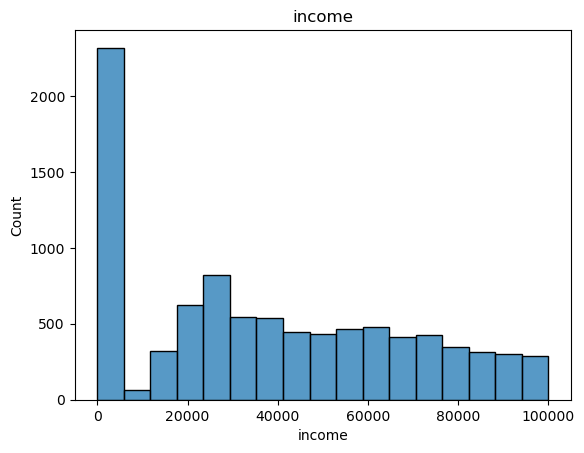

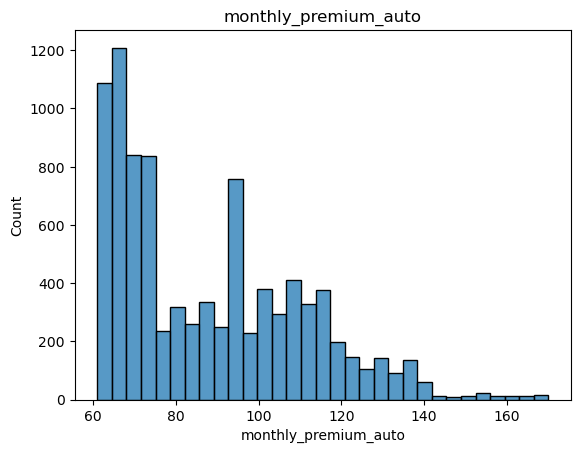

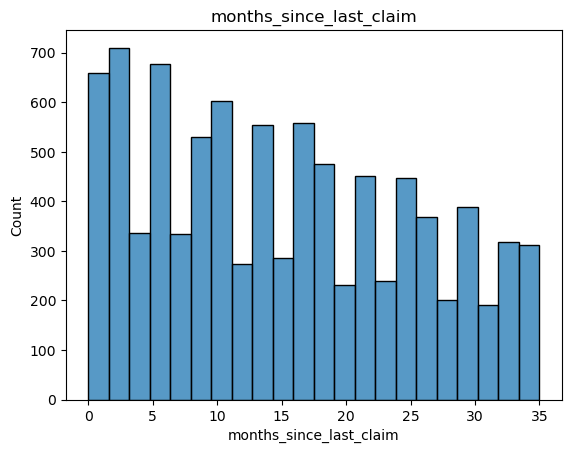

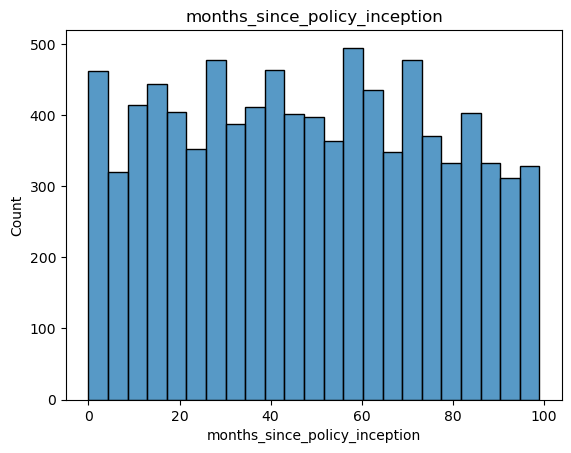

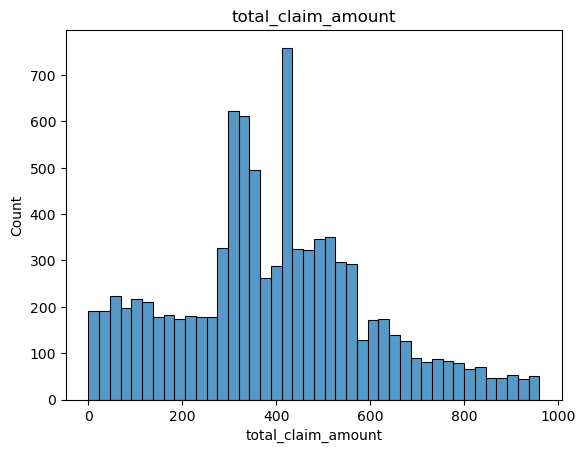

In [7]:
def continuous_plot(DataFrame):
    for col in DataFrame.columns:
        sns.histplot(x=DataFrame[col])
        plt.title(col)
        plt.show()
    return
continuous_plot(continuous_df_2)

In [8]:
for col in  continuous_df_2.columns:
    if min(continuous_df_2[col]) > 0:
        continuous_df_2[col] = stats.boxcox(continuous_df_2[col])[0]
    else:
        continuous_df_2[col] = np.log(continuous_df_2[col])

C:\Users\pc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


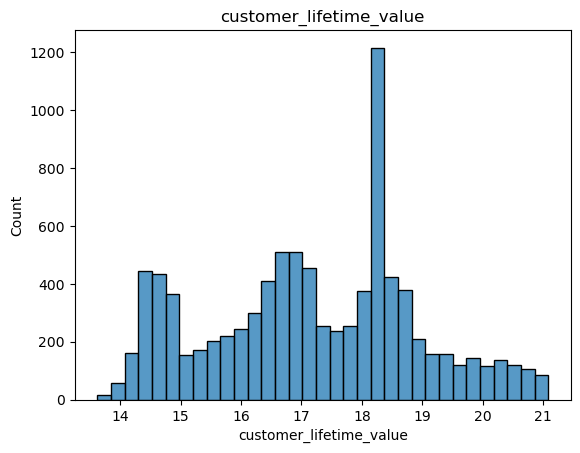

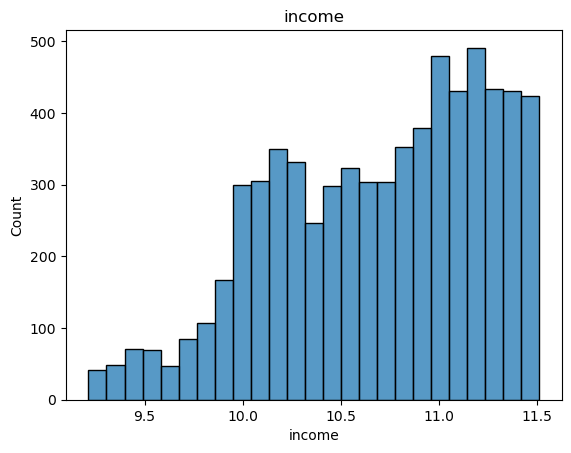

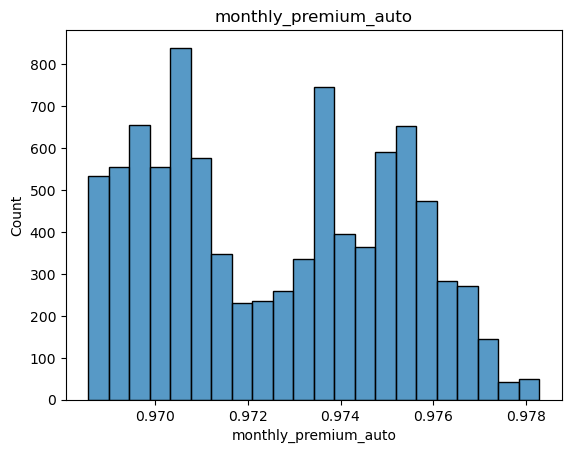

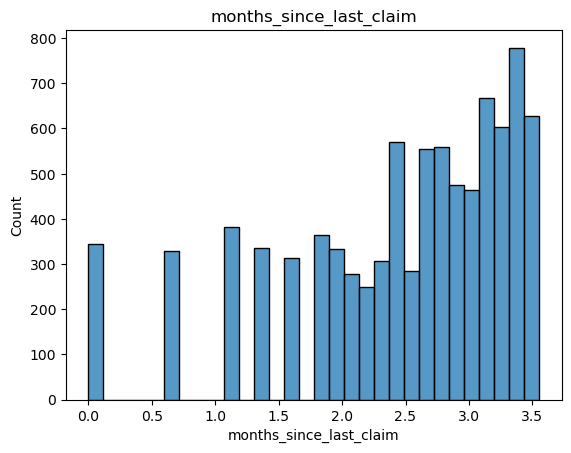

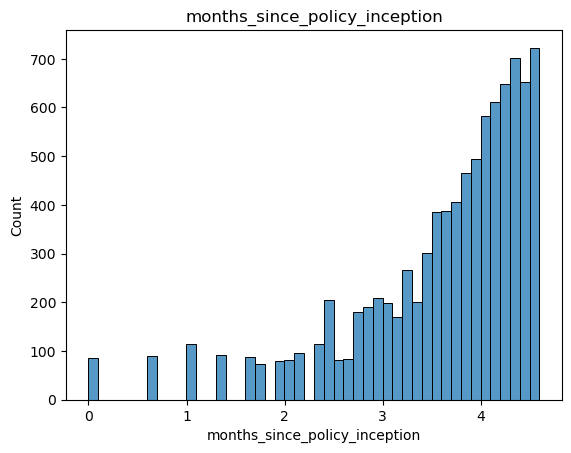

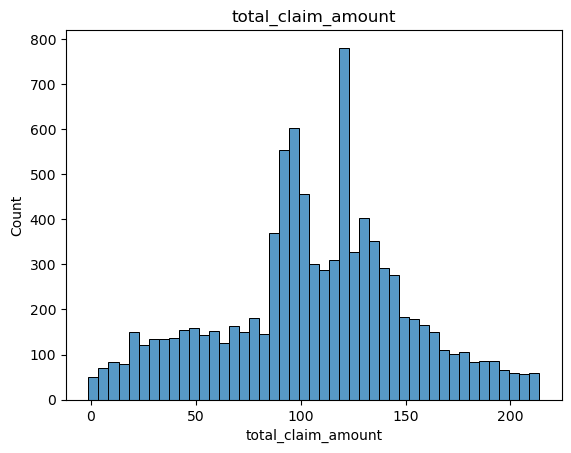

In [9]:
def continuous_plot(DataFrame):
    for col in DataFrame.columns:
        sns.histplot(x=DataFrame[col])
        plt.title(col)
        plt.show()
    return
continuous_plot(continuous_df_2)

In [10]:
# 4. Encode the categorical variables
categoricals_onehot = categoricals.select_dtypes(object)
categoricals_onehot.head()

,employment_status,location_code,marital_status,vehicle_class
0,Employed,Suburban,Married,Two-Door Car
1,Unemployed,Suburban,Single,Four-Door Car
2,Employed,Suburban,Married,Two-Door Car
3,Unemployed,Suburban,Married,SUV
4,Employed,Rural,Single,Four-Door Car


In [11]:
one_hot_names = []
for col in categoricals_onehot.columns:
    col_uniques = sorted(categoricals_onehot[col].unique())
    for unique in col_uniques:
        one_hot_names.append(unique)

categoricals_onehotclean = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(categoricals_onehot))
                             .transform(pd.DataFrame(categoricals_onehot)).toarray())
categoricals_onehotclean.columns = one_hot_names

In [12]:
categoricals_onehotclean.head()

,Disabled,Employed,Medical Leave,Retired,Unemployed,Rural,Suburban,Urban,Divorced,Married,Single,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# I had less variables than the ones in the Hint section of the Lab because I dropped some that I found to be redundant in the
# Feature Extraction lab.

In [14]:
# 5. The time variable can be useful. Try to transform its data into a useful one.
# Hint: Day week and month as integers might be useful.
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [15]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df['week'] = customer_df['effective_to_date'].dt.week
customer_df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_23968\3441188769.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  customer_df['week'] = customer_df['effective_to_date'].dt.week


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,day,week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24,8
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19,7
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3,5


In [16]:
# Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, 
# change it using encoding.

final_customer_df =  pd.DataFrame(np.concatenate((
    continuous_df_2,
    discrete_df,
    categoricals.select_dtypes([np.float64,np.int64]),
    categoricals_onehotclean,
    customer_df[['month','day','week']]                              
                              ),axis=1))

column_names = (
    list(continuous_df_2.columns) +
    list(discrete_df.columns) +
    list(categoricals.select_dtypes([np.float64, np.int64]).columns) +
    list(categoricals_onehotclean.columns) +
    ['month', 'day', 'week']
)
final_customer_df.columns = column_names

In [17]:
final_customer_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,number_of_open_complaints,number_of_policies,coverage,education,...,Single,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,month,day,week
0,14.759257,10.937988,0.970325,3.465736,1.609438,108.218600,0.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,24.0,8.0
1,17.849027,-inf,0.973908,2.564949,3.737670,118.407894,0.0,8.0,2.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,5.0
2,20.132246,10.794809,0.975185,2.890372,3.637586,144.401037,0.0,2.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,19.0,7.0
3,18.175915,-inf,0.975024,2.890372,4.174387,137.392989,0.0,7.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,20.0,3.0
4,14.815434,10.688211,0.971065,2.484907,3.784190,50.092051,0.0,1.0,1.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0


In [18]:
positive_infs = final_customer_df.isin([np.inf]).sum()
negative_infs = final_customer_df.isin([-np.inf]).sum()

infs_check = pd.DataFrame([positive_infs,negative_infs]).T
infs_check.columns =['Inf','-Inf']
infs_check

,Inf,-Inf
customer_lifetime_value,0,0
income,0,2317
monthly_premium_auto,0,0
months_since_last_claim,0,314
months_since_policy_inception,0,83
total_claim_amount,0,0
number_of_open_complaints,0,0
number_of_policies,0,0
coverage,0,0
education,0,0


In [19]:
infs_check.sum()

Inf        0
-Inf    2714
dtype: int64

In [20]:
for col in ['income','months_since_last_claim','months_since_policy_inception']:
    final_customer_df[col].replace(-np.inf,final_customer_df[col][final_customer_df[col]!=-np.inf].min(),inplace=True)

In [21]:
final_customer_df['income'][final_customer_df['income']!=-np.inf].min()

9.2140335438138

In [22]:
infs_check = pd.DataFrame(
    [final_customer_df.isin([np.inf]).sum(),
     final_customer_df.isin([-np.inf]).sum()]
).T
infs_check.columns =['Inf','-Inf']
infs_check.sum()

Inf     0
-Inf    0
dtype: int64

In [23]:
final_customer_df.dtypes

customer_lifetime_value          float64
income                           float64
monthly_premium_auto             float64
months_since_last_claim          float64
months_since_policy_inception    float64
total_claim_amount               float64
number_of_open_complaints        float64
number_of_policies               float64
coverage                         float64
education                        float64
gender                           float64
vehicle_size                     float64
Disabled                         float64
Employed                         float64
Medical Leave                    float64
Retired                          float64
Unemployed                       float64
Rural                            float64
Suburban                         float64
Urban                            float64
Divorced                         float64
Married                          float64
Single                           float64
Four-Door Car                    float64
Luxury Car      

In [24]:
final_customer_df.to_csv('final_customer_df.csv')